In [326]:
import pandas as pd

In [327]:
data = pd.read_csv("all_data.csv")

In [328]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [329]:
### To check how much null values we have in the overall dataset

In [330]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [331]:
### To drop the NaN rows

In [332]:
data = data.dropna()

data.isnull().sum()  ## To check the updated NaN values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [333]:
## To extract the Order month from the Order data expression

In [334]:
data['sales_month'] = data['Order Date'].str[0:2]

In [335]:
## To check the list of all columns present in the dataset

In [336]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'sales_month'],
      dtype='object')

In [337]:
## To filter out NaN rows and set the same as a new dataset

In [338]:
data = data[data['sales_month'] != 'Or']
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales_month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [339]:
## To convert datatype from object to int

In [340]:
data['sales_month'] = data['sales_month'].astype(int)  #Object to INT

In [341]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)  #Object to INT

In [342]:
data['Price Each'] = data['Price Each'].astype(float) #Object to float

In [343]:
data['Order Date'] = pd.to_datetime(data['Order Date']) #Object to datatime

In [344]:
## Calculated field

In [345]:
data['sales'] = data['Quantity Ordered'] * data['Price Each']

In [346]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales_month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [347]:
## Question 1: What was the best month for the sales ?

In [348]:
sales_by_month = data.groupby('sales_month')['sales'].sum()

sales_by_month

sales_month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

In [349]:
import matplotlib.pyplot as plt

In [350]:
month = list(range(1,13))
month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

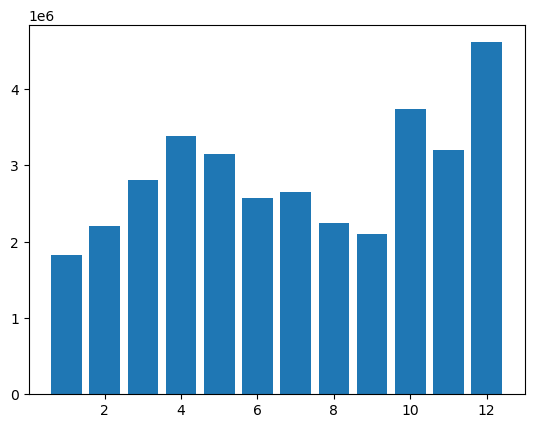

In [351]:
plt.bar(month,sales_by_month)
plt.show()

In [352]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales_month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [353]:
## How to split a string into multiple columns then select only the required ones

In [354]:
data['city'] = data['Purchase Address'].str.split(',',expand = True)[1]

In [355]:
## How to split a string and then trim to get the necessary value

In [356]:
data['state'] = data['Purchase Address'].str.split(',',expand = True)[2]

data['state'] = data['state'].str.strip().str[:-6]

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales_month,sales,city,state
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [357]:
## Question 2: What city has the highest number of sales ?

In [358]:
sales_by_city = data.groupby('city')['sales'].sum()

sales_by_city

city
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: sales, dtype: float64

In [359]:
city = [city for city, df in data.groupby('city')]
city

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

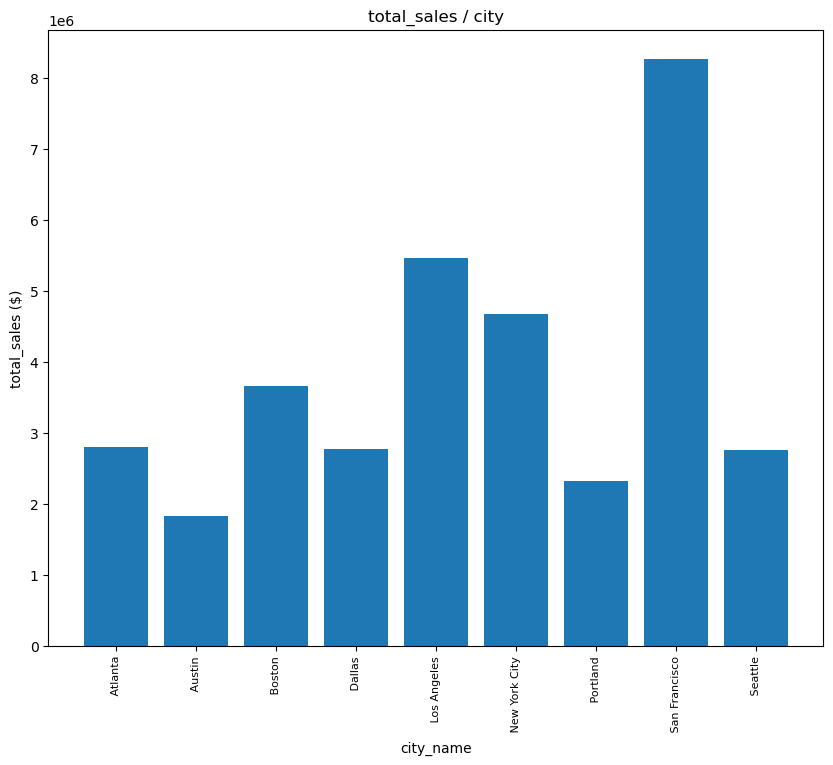

In [360]:
plt.figure(figsize=(10,8))
plt.bar(city,sales_by_city)
plt.xticks(rotation = 'vertical',size = 8)
plt.xlabel('city_name')
plt.ylabel('total_sales ($)')
plt.title('total_sales / city')
plt.show()

In [361]:
 ## What time should we display advertisemets to maximize the likelihood of customer buying the products ?

In [362]:
data['hour'] = data['Order Date'].dt.hour
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales_month,sales,city,state,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


In [363]:
order_by_hour = data.groupby('hour')['Order ID'].count()
order_by_hour

hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

In [364]:
range_hour = list(range(0,24))
range_hour

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

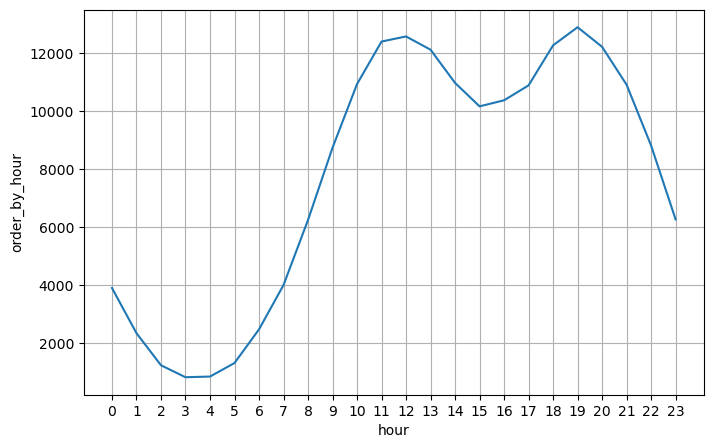

In [365]:
plt.figure(figsize=(8,5))
plt.plot(range_hour,order_by_hour)
plt.xticks(range_hour)
plt.xlabel('hour')
plt.ylabel('order_by_hour')
plt.grid()
plt.show()

In [366]:
## What products are most often sold together ?

In [367]:
## Creating a new dataset to group all the duplicated orders in order to get the set of products which are purchased together

In [368]:
temp_data = data[data['Order ID'].duplicated(keep = False)]
temp_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales_month,sales,city,state,hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11


In [369]:
temp_data['grouped_product'] = temp_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

temp_data_02 = temp_data[['Order ID','grouped_product']].drop_duplicates().reset_index()

temp_data_02.head()

/var/folders/6l/_1w0bhn90l76r8fg08zzqpkw0000gn/T/ipykernel_6006/2592079225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['grouped_product'] = temp_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,index,Order ID,grouped_product
0,3,176560,"Google Phone,Wired Headphones"
1,18,176574,"Google Phone,USB-C Charging Cable"
2,30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,32,176586,"AAA Batteries (4-pack),Google Phone"
4,119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [370]:
from itertools import combinations
from collections import Counter

In [371]:
count = Counter()

for row in temp_data_02['grouped_product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [372]:
## What product sold the most ? Why do you think it sold the most ?

In [373]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales_month,sales,city,state,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


In [374]:
## Grouping products based on total quantity ordered

In [375]:
most_qnt_product = data.groupby('Product')['Quantity Ordered'].sum()


most_qnt_product



Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [376]:
products = [Product for Product, df in data.groupby('Product')]

products

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

/var/folders/6l/_1w0bhn90l76r8fg08zzqpkw0000gn/T/ipykernel_6006/1139057408.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical')


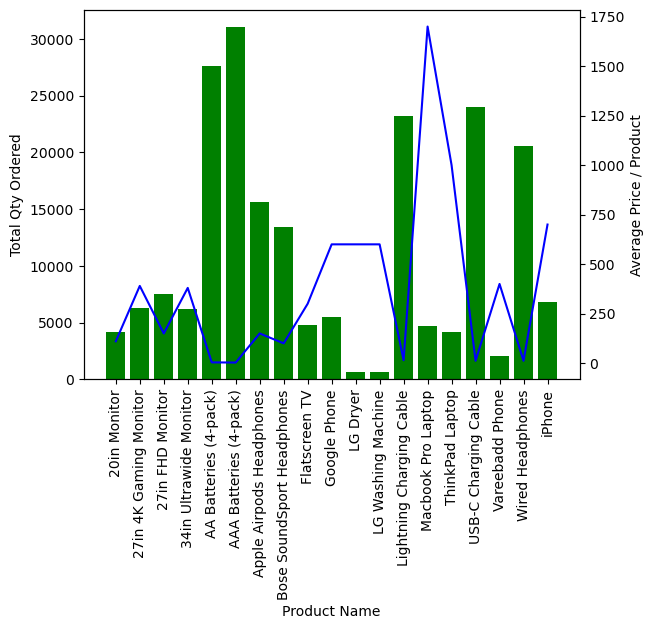

In [377]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,most_qnt_product,color = 'g')
ax2.plot(products,avg_price,color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Total Qty Ordered')
ax2.set_ylabel('Average Price / Product')
plt.show()
